In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.033585,2.91625,-1.062200,1.128923,0.943267,-1.482668,-0.258452,0.384230,0.693823,0.142663,-0.218899,-0.078493,0.262722,0
1,0.865959,1.87300,-1.007350,1.128923,-0.389548,-0.737662,-0.884386,0.384230,0.693823,-0.146811,-0.218899,-2.327069,0.262722,0
2,-0.042086,-0.21350,0.245214,-0.438652,-1.722363,-0.240991,-0.258452,0.384230,0.693823,-0.146811,-0.218899,-0.078493,0.262722,0
3,1.092971,-0.21350,0.425761,-1.222440,-0.389548,-0.240991,-0.884386,-2.018206,0.693823,-0.146811,-0.218899,-0.078493,0.262722,0
4,-0.798790,-0.21350,1.407179,1.128923,-0.389548,0.752350,2.245285,-2.018206,-1.441290,-0.146811,-0.218899,-0.078493,-5.330650,0


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Assuming 'data' contains your dataset

# Drop the target column from features
X = data.drop(columns=['income'])
y = data['income']

# Convert categorical variables into numerical representation (One-Hot Encoding)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(50, 200),  # Sample from 50 to 200
    'max_depth': [None, 10, 20],         # Fixed values
    'min_samples_split': randint(2, 10), # Sample from 2 to 10
    'min_samples_leaf': randint(1, 4)    # Sample from 1 to 4
}

# Create the randomized search object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,  # Number of parameter settings that are sampled
                                   cv=3,       # 3-fold cross-validation
                                   scoring='accuracy',
                                   n_jobs=-1) # Use all available cores

# Perform the randomized search
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

# Use the best parameters to create the final model
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the final model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data using the final model
best_predictions = best_rf_model.predict(X_test)

# Calculate accuracy using the final model
best_accuracy = accuracy_score(y_test, best_predictions)
print("Accuracy with Optimized Parameters:", best_accuracy)

# Generate classification report with the final model
best_report = classification_report(y_test, best_predictions)
print("Classification Report with Optimized Parameters:")
print(best_report)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 181}
Best Accuracy: 0.8612618315824591
Accuracy with Optimized Parameters: 0.8680686220254565
Classification Report with Optimized Parameters:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6830
           1       0.77      0.65      0.71      2205

    accuracy                           0.87      9035
   macro avg       0.83      0.79      0.81      9035
weighted avg       0.86      0.87      0.86      9035



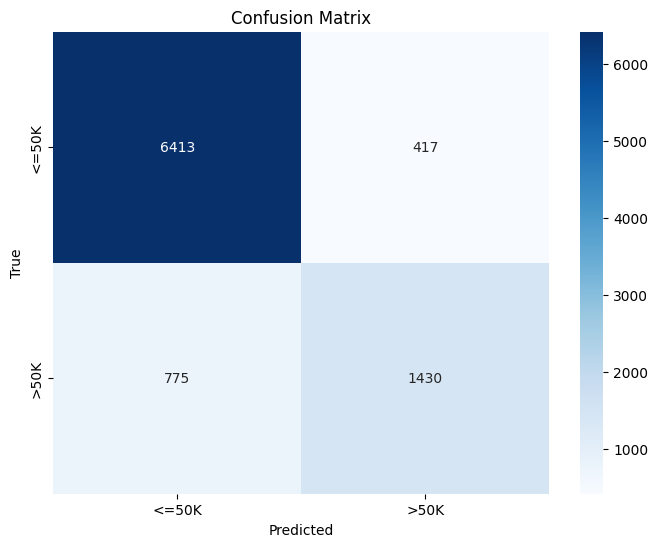

In [6]:
# Generate confusion matrix for the final model
conf_matrix = confusion_matrix(y_test, best_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()